## Problem 1: Extending the Lady Tasting Tea
**********************************
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design

In [ ]:
#Import Libraries
import math
import numpy as np
import random
import matplotlib.pyplot as plt 
import itertools

In [3]:
#Set up the experiment
cups = 12 #12 cups of tea are made
milk_first = 4 #4 of which have the milk added first 

math.comb(cups, milk_first) #math.comb will return the number of ways to choose 4 cups from 12, order does not matter

495

### Combinations 

In the code cell above, `math.comb()` returned the number of ways to choose 4 cups from 12, without being able to choose the same cup twice, order does not matter.
- The calculation returned that there are 495 ways to choose 4 cups from 12. How did it come up with this number? 

#### Explanation of `math.comb()`

Cups: `1 2 3 4 5 6 7 8 9 10 11 12`

Placeholders: `_ _ _ _`

- In the scenario where order does matter, i.e. choosing cups `2`, `4`, `5`, `8`,  is not the same as choosing cups `8`, `4`, `5`, `2`, which is not the same as `2`, `5`, `8`, `4` and so on... 
- The number of ways to choose 4 cups in this scenario  ends up being `12*11*10*9`  because when a cup is put in place 1, there are 11 options for place 2. When a cup is put in place 2, there are 10 remaining options for place 3, when a cup is put in place 3, there are 9 remaining options for place 4. 
- But, in this Lady Tasting Tea Experiment, we do not care about the order, so we would take the results of `12*11*10*9` and divide that by the amount of orders the 4 cups can have, which is `4*3*2*1`.
- `12*11*10*9` is actually $12! \div (12-4)!$
- `4*3*2*1` is $4!$
- So, this becomes the Combinations Formula:

$$
\frac{n!}{k!\times(n-k)!}
$$

In [ ]:
# The labels on the cups:
labels = list(range(12))
# The 495 combinations of 4 cups that exist
combs = list(itertools.combinations(labels, 4))
# The actual combination of cups that contain the milk first 
milk_cups = random.sample(labels, 4)
milk_cups

[0, 1, 6, 2]

In [6]:
#Get the intersection between the list of 495 combinations and the actual set with milk first 
milk_cups_set = set(milk_cups)
number_overlaps = []

for comb in combs:
    # for each combination in the list - first make it into a set so that the .intersections() function works
    comb_set = set(comb)
    # use intersection() to ascertain which (if any) of the cups in your comb overlap with the set of milk_cups
    overlap = comb_set.intersection(milk_cups_set)
    # How many overlap? 
    number_overlaps.append(len(overlap))

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))


<BarContainer object of 5 artists>

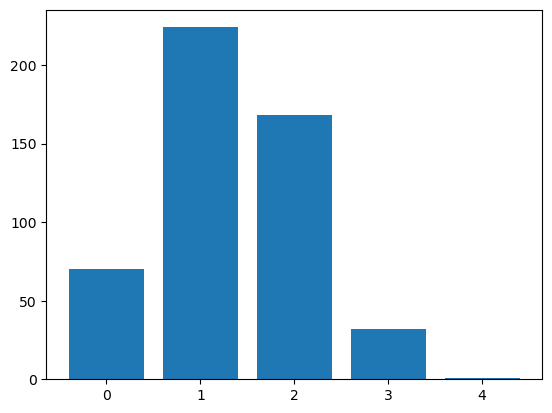

In [ ]:
# Now find out in how many of the 495 combinations do the 4 milk cups overlap (obviously only once)
# In how many of the 495 combinations do the 4 milk cups not show up?
# How many overlap 1 cup, 2 cups, 3 cups

counts = np.unique(number_overlaps, return_counts=True)
print(counts)
plt.bar(counts[0], counts[1])

In [ ]:
#From the above overlaps in the list of 495 possible combinations
p_zero_cups = 70/495
p_one_cup = 224/495
p_two_cups = 168/495  
p_three_cups = 32/495
p_all_cups = 1/495

p_at_least_three_cups = (1+32)/495
p__at_least_two_cups = (1+32+168)/495
p_at_least_one_cup = (1+32+168+224)/495

0.06464646464646465

### Hypothesis Testing 

#### $H0$ Null Hypothesis: 
- She cannot tell the difference - she is choosing the cups at random 

#### $Ha$ Alternative Hypothesis
- She is choosing the cups not at random

### Performing the Hypothesis Test 
- First, we need to compute the *p*-value for each of the options, assuming the null hypothesis that she cannot distinguish the cup. 
    - The code cell above computes the *p*-value for each possible event. 
- We then need to set a significance level. If the *p*-value falls below the significance level we have set, we can reject the null hypothesis in favour of the alternative hypothesis that she is not choosing at random.
    - Setting a significance level of 0.05 will give us a 5% chance of incorrectly accepting or rejecting the null hypothesis. 
$$ 
\alpha = 0.05 
$$

In [22]:
print(f"The p-value for correctly choosing the 4 milk first cups at random is {p_all_cups:.3f}.")
print(f"This is below our significance level of {alpha}, so the result is statistically significant.")
print("Therefore, if the lady chooses 4 cups correctly, we can reject the null hypothesis in favour of the alternative hypothesis.")


The p-value for correctly choosing the 4 milk first cups at random is 0.002.
This is below our significance level of 0.05, so the result is statistically significant.
Therefore, if the lady chooses 4 cups correctly, we can reject the null hypothesis in favour of the alternative hypothesis.


In [20]:
print(f"The p-value for choosing 3 correct cups is {p_three_cups:.3f}, which is above our significance level of {alpha}.")
print("This result is not statistically significant. \nIf the lady chooses 3 cups correctly, we cannot reject the null hypothesis at the 5% significance level.")


The p-value for choosing 3 correct cups is 0.065, which is above our significance level of 0.05.
This result is not statistically significant. 
If the lady chooses 3 cups correctly, we cannot reject the null hypothesis at the 5% significance level.


## Problem 2: Normal Distribution
************************
Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased